In [6]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import chi2_contingency


csv_file = Path('Resources/framingham.csv')

heart_analysis_df = pd.read_csv(csv_file)

heart_analysis_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [7]:
def pie_chart(df, title, column_name, labels, angle=0):
    pop_count1 = (df[column_name] == 1).sum()
    pop_count2 = (df[column_name] == 0).sum()
    total_count = pop_count1 + pop_count2
    print(f'{labels[0]}: {pop_count1}')
    print(f'{labels[1]}: {pop_count2}')
    print(f'Total population: {total_count}')
    
    # Prepare data for pie chart
    sizes = [pop_count1, pop_count2]
    
    # Create DataFrame for plotting
    population_df = pd.DataFrame({'Status': labels, 'Count': sizes})
    
    # Plot pie chart
    population_df.plot.pie(y='Count', labels=population_df['Status'], autopct='%1.1f%%', legend=False, startangle=angle)
    plt.title(title)
    plt.ylabel('')
    plt.show()

In [8]:
## Male vs Female Population

### Analysis:

Male: 1820
Female: 2420
Total population: 4240


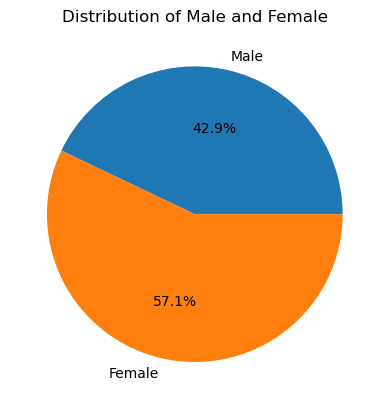

In [9]:
pie_chart(heart_analysis_df, 'Distribution of Male and Female', 'male', ['Male', 'Female'])

## Diabetes and Heart Disease

### Analysis:

The correlation between diabetes and the risk of developing coronary heart disease (CHD) over ten years reveals a significant likelihood of having CHD. Individuals with diabetes exhibit a higher rate of CHD, with 36.7% of diabetic patients experiencing CHD, compared to only 14.62% of non-diabetic individuals. This significant difference is supported by a T-test, yielding a statistic of 4.73 and a p-value of approximately 0.0000068. Being that our p-value is so low this indicates the difference between the populations is not due to random chance. The T-statistic emphasizes the strength in our argument that there is a correlation of diabetes and CHD. Diabetes is a significant risk factor for the development of CHD. These findings let us argue that diabetic individuals need to be more thorough with their health to prevent heart disease.


Diabetics: 109
Non-diabetic: 4131
Total population: 4240


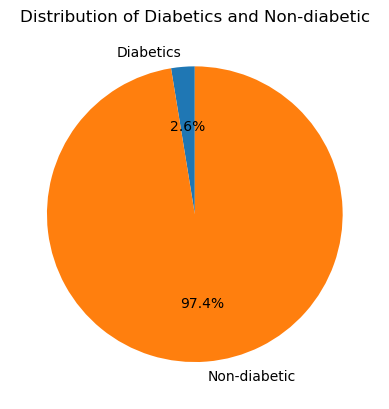

In [10]:
pie_chart(heart_analysis_df, 'Distribution of Diabetics and Non-diabetic','diabetes', ['Diabetics', 'Non-diabetic'], 90)

In [11]:
diabetics = heart_analysis_df[heart_analysis_df['diabetes'] == 1] 
non_diabetics = heart_analysis_df[heart_analysis_df['diabetes'] == 0]

diabetics_mean = round(diabetics['TenYearCHD'].mean() * 100, 2)
non_diabetics_mean_mean = round(non_diabetics['TenYearCHD'].mean() * 100, 2)
print(f'Mean for Diabetics who have TenYearCHD: {diabetics_mean}%')
print(f'Mean for Non-diabetics who have TenYearCHD: {non_diabetics_mean_mean}%')
print(stats.ttest_ind(diabetics['TenYearCHD'], non_diabetics['TenYearCHD'], equal_var=False))

Mean for Diabetics who have TenYearCHD: 36.7%
Mean for Non-diabetics who have TenYearCHD: 14.62%
TtestResult(statistic=4.7268934172796735, pvalue=6.731476987309913e-06, df=111.05606545935888)


## Limitations (Move to Limitations section)

So it's common knowledge that people with diabetes are twice as likely to have heart disease. (Check out [Diabetes and Your Heart](https://www.cdc.gov/diabetes/library/features/diabetes-and-heart.html#:~:text=If%20you%20have%20diabetes%2C%20you,are%20to%20have%20heart%20disease.) for more info.) Since our population for dianietes is so low we would have liked a higher population of diabetics in this dat set to have more confidence in our analysis.

In [ ]:

education_counts_df = heart_analysis_df

education_counts_df['education'] = education_counts_df['education'].astype(str)

education_counts_df['education'] = education_counts_df['education'].replace('nan', 'Not Specified')

education_counts_df = education_counts_df['education'].value_counts().sort_index()

education_counts_df.plot(kind='bar')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0) 
plt.show()

In [ ]:
# Create a histogram for the age distribution
age_histogram = heart_analysis_df
plt.hist(age_histogram['age'], bins=10, edgecolor='black') 
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.grid(axis='y', alpha=0.75) 

plt.show()

In [ ]:
male_df = heart_analysis_df[heart_analysis_df['male'] == 1]
female_df = heart_analysis_df[heart_analysis_df['male'] == 0]
number_of_male_TYCHD = male_df[male_df['TenYearCHD'] == 1]['TenYearCHD'].sum()
number_of_female_TYCHD = female_df[female_df['TenYearCHD'] == 1]['TenYearCHD'].sum()

male_percentage = round((number_of_male_TYCHD/male_df["TenYearCHD"].count()) * 100, 2)
female_percentage = round((number_of_female_TYCHD/female_df["TenYearCHD"].count()) * 100, 2)

print(f'Male % of heart disease: {male_percentage}%')
print(f'Female % of heart disease: {female_percentage}%')

## Atuls's Section

In [ ]:
print('This is your teammates Atul\'s Section')

## Ezrelle's Section

## Cigaretteette's and Heart Disease

## Analysis:

## Smoker Population:

The distribution between smokers and non-smokers is nearly balanced, with non-smokers slightly outnumbering smokers. This suggests that the dataset includes a diverse set of individuals regarding their smoking habits.

When comparing smoking populations between males and females we can see that males are significantly more likely to smoke. We know this because our p-value is exrememly small (2.2043519152601072e-38) and the t-statistic direction (13.09 positive), this suggests males have the higher rates of smoking. There isn't enough data to make concise assumptions on why males smoke more than females. Other factor such as lifestyle choices, cultural influences, or socioeconomic conditions contribute to the reason why. We can only speculate on the potential reasons for this observed difference.

Heavy Smokers: Our data set shows that our smoking population tend to be heavy smokers. Specifically, the group smoking "21-30 cigs per day" represents the largest percentage (38.53%) of the smoker population. Additionally, the "30+ cigs per day" group also constitutes a substantial proportion (19.26%). This indicates that a majority of the smoking population tends towards higher daily cigarette consumption.

Moderate and Light Smokers: The categories "11-20 cigs per day" and "6-10 cigs per day" together make up about 32.81% of the smoker population. This suggests that while there is a considerable portion of the population that smokes moderately, the trend leans more towards heavier smoking habits.

Health Implications: The high percentages of smokers in the heavier smoking categories ("21-30" and "30+") are concerning from a public health perspective. Higher daily cigarette consumption is strongly associated with greater health risks, including increased risk of cardiovascular diseases. The distribution suggests that a significant portion of the smoker population is at a higher risk for these health issues.

This would all make sense being that the average age for our population's of smoker's is 47.73 years. Meaning when it comes to our smoker population we are dealing with an older generation. It is common knowledge that other generations were told smoking din't cause health problems. 

So given that our smoker population is a majority of heavy smokers it would be fair to make a hypothises that the more you smoke the worse your health conditions get. 

In [ ]:
pie_chart(heart_analysis_df, 'Distribution of Smoker and Non-smoker', 'currentSmoker', ['Smoker', 'Non-smoker'])
pie_chart(male_df, 'Male Distribution of Smoker and Non-smoker', 'currentSmoker', ['Smoker', 'Non-smoker'])
pie_chart(female_df, 'Female Distribution of Smoker and Non-smoker', 'currentSmoker', ['Smoker', 'Non-smoker'])
stats.ttest_ind(male_df.currentSmoker, female_df.currentSmoker, equal_var=False)

In [ ]:
smoker_df = heart_analysis_df[heart_analysis_df['currentSmoker'] == 1]
avg_age_of_smoker = round(smoker_df.age.mean(), 2)
avg_num_of_cigs = round(smoker_df.cigsPerDay.mean(), 2)

print(f'Average age of Smoker: {avg_age_of_smoker} years')
print(f'Average number of cigs per day for a smoker is: {avg_num_of_cigs} a day')

In [ ]:
cigs_per_day_counts = smoker_df['cigsPerDay'].value_counts().sort_index()

bins = [0, 5, 10, 20, 30, 100]
labels = ['0-5', '6-10', '11-20', '21-30', '30+']

smoker_df.loc[:, 'cigsPerDay_bins'] = pd.cut(smoker_df['cigsPerDay'], bins=bins, labels=labels, right=False)

cigs_per_day_grouped = smoker_df['cigsPerDay_bins'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.title('Number of Smokers by Cigarettes per Day')
plt.xlabel('Cigarettes per Day')
plt.ylabel('Number of Smokers')

total_count = cigs_per_day_grouped.sum()
percentages = (cigs_per_day_grouped / total_count) * 100
bars = plt.bar(cigs_per_day_grouped.index, cigs_per_day_grouped.values, color='red')
i = 0
for bar, percentage in zip(bars, percentages):
    print(f'{labels[i]} cigs per day: {percentage:.2f}%')
    i += 1
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{percentage:.2f}%', ha='center', va='bottom')


plt.show()

## Analysis:

- Note: Systolic Blood Pressure is pressure exerted blood is ejected into the arteries.  Diastolic Blood Pressure is pressure blood exerts within arteries between heartbeats.

- Normal Systolic Blood Pressure is 120mmHg
- Normal Dystolic Blood Pressure is 80mmHg

### Blood Pressure:

Looking at the blood pressure we can see that the non-smokers tend to have a higher blood pressure on average then the smokers. While the dataset suggests that non-smokers have higher average blood pressure than smokers, this counterintuitive result calls for the fact that other lifestyle and health factors are affecting blood pressure. It also highlights the complexity of cardiovascular risk assessment.

### Cigarette per day vs Blood presure:

Given that the r-value is low for all population of groups of smokers (all smokers, smokers at risk of CHD, smokers not at risk of CHD), and that the linear regression correlation lines are mostly flat, we can comfortably say that the number of Cigarette someone smokes does not directly correlate with your blood pressure whether is be your Systolic or Dystolic Blood Pressure. Given this we should try to find a correlation between age and blood pressure for both population of smokers and non-smokers.

### Age vs Blood Pressure:

The provided scatter plot data includes correlation coefficients and linear regression equations for the relationship between age and blood pressure among smokers, further divided into two subgroups based on their risk of Ten-Year Coronary Heart Disease (CHD). Looking at the data we can see moderate positive correlation between age and systolic blood pressure among smokers, with small differences in the rate of blood pressure increase and baseline levels depending on CHD risk status. This would make sense because as you age the harder your heart has to work to push blood throughout your body. From our groups of smokers you can see a trend that their hearts may be working a little harder then those who do not smoke. Being that their slopes and r-values are greater than the non-smokers slopes and r-values. 

### Age vs Total Cholesterol: 

Another hypothesis we wanted to test was if smoking over long periods of time does increase total cholesterol. Note there is 2 kinds of cholesterol, [(bad cholesterol) LDL cholesterol and (good cholesterol) HDL cholesterol](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576744/#:~:text=The%20nicotine%20in%20tobacco%20causes,lipids%20in%20the%20arterial%20wall.). This data accounts for the combination of these cholesterol, total cholesterol. We can see from the scatter plots that total cholesterol does increase as you age. When it comes to smoker's though their cholesterol levels tend to increase at a slower rate as they age. This correlation is not as strong as non-smokers. Meaning that smoking could be decreasing their good cholesterol levels and their bad cholesterol levels increasing as they age. Neatly enough though the population of smokers who are at risk of CHD, their r-value is negative and their slope is slightly negative. This means that ageing does not affect your total cholesterol levels. This may imply other factors such as smoking or other lifestyle choices are having a very slight negative effect on their cholesterol levels. When is comes to non-smokers you can see that their cholestorol also go up with age and at a faster rate as well. This though may be because their good cholestorl levels are taking up a majority of their total cholesterol levels. This is not the case for the non-smokers who are at risk of CHD. Being that there slope is zero and their r-value is very though this implies that for them age is not a factor for their risk of CHD, other facters are probably play a more sigificant role in their risk for CHD. 

In [ ]:
# population of non smokers in our data set.
non_smokers_df = heart_analysis_df[heart_analysis_df['currentSmoker'] == 0]

# population of non smokers who are and are not at risk of Ten Year Coronary Heart Disease
non_smokers_at_risk_df = non_smokers_df[non_smokers_df['TenYearCHD'] == 1]
non_smokers_no_risk_df = non_smokers_df[non_smokers_df['TenYearCHD'] == 0]

# population of smokers who are and are not at risk of Ten Year Coronary Heart Disease
smoker_at_risk_df = smoker_df[smoker_df['TenYearCHD'] == 1]
smoker_no_risk_df = smoker_df[smoker_df['TenYearCHD'] == 0]

# General averages

smoker_sys_bp_avg = smoker_df.sysBP.mean()
smoker_dia_bp_avg = smoker_df.diaBP.mean()
non_smokers_sys_bp_avg = non_smokers_df.sysBP.mean()
non_smokers_dia_bp_avg = non_smokers_df.diaBP.mean()

print(f'The smoker populations Systolic BP avg is: {smoker_sys_bp_avg:.2f} (Normal is 120mmHg)')
print(f'The smoker populations Dystolic BP avg is: {smoker_dia_bp_avg:.2f} (Normal is 80mmHg)')
print(f'The non-smoker populations Systolic BP avg is: {non_smokers_sys_bp_avg:.2f} (Normal is 120mmHg)')
print(f'The non-smoker populations Dystolic BP avg is: {non_smokers_dia_bp_avg:.2f} (Normal is 80mmHg)')
print()
print("T Test results for Systolic BP for smokers and non-smokers:")
print(stats.ttest_ind(smoker_df.sysBP, non_smokers_df.sysBP, equal_var=False))
print()
print("T Test results for Dystolic BP for smokers and non-smokers:")
print(stats.ttest_ind(smoker_df.diaBP, non_smokers_df.diaBP, equal_var=False))

In [ ]:
def plot_linear_regression(df, x_col, y_col, title, x_label, y_label, x_pos, y_pos, ticks=False):
    # Drop rows with NaN values in the specified columns
    df_clean = df.dropna(subset=[x_col, y_col])
    
    # Extract x and y values
    x = df_clean[x_col]
    y = df_clean[y_col]
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Calculate the regression values for plotting
    reg_values = x * slope + intercept
    
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.plot(x, reg_values, color='red')  # Plot the regression line
    
    # Annotate the plot with the linear equation
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(x_pos, y_pos), xycoords='axes fraction', fontsize=12, color='red')
    
    # Print the r-value
    print(f'The r-value is: {r_value}')
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if (ticks):
        plt.yticks([0, 1], ['No Risk', 'At Risk'])
    
    # Show the plot
    plt.show()

In [ ]:
# Scatter plot for cigsPerDay vs. sysBP
plot_linear_regression(
    smoker_df, 
    'cigsPerDay', 
    'sysBP', 
    'Cigarettes per Day vs. Systolic Blood Pressure', 
    'Cigarettes per Day',
    'Systolic Blood Pressure (sysBP)', 
    0.5, 
    0.95
)

plot_linear_regression(
    smoker_at_risk_df, 
    'cigsPerDay', 
    'sysBP', 
    'Cigarettes per Day vs. Systolic Blood Pressure in smokers at risk', 
    'Cigarettes per Day',
    'Systolic Blood Pressure (sysBP)', 
    0.5, 
    0.95
)

plot_linear_regression(
    smoker_no_risk_df, 
    'cigsPerDay', 
    'sysBP', 
    'Cigarettes per Day vs. Systolic Blood Pressure in smokers not at risk', 
    'Cigarettes per Day',
    'Systolic Blood Pressure (sysBP)', 
    0.5, 
    0.95
)

In [ ]:
# Scatter plot for cigsPerDay vs. diaBP
plot_linear_regression(
    smoker_df, 
    'cigsPerDay', 
    'diaBP', 
    'Cigarettes per Day vs. Diastolic Blood Pressure', 
    'Cigarettes per Day',
    'Diastolic Blood Pressure (diaBP)', 
    0.5, 
    0.95
)

plot_linear_regression(
    smoker_at_risk_df, 
    'cigsPerDay', 
    'diaBP', 
    'Cigarettes per Day vs. Diastolic Blood Pressure in smokers at risk', 
    'Cigarettes per Day',
    'Diastolic Blood Pressure (diaBP)', 
    0.5, 
    0.95
)

plot_linear_regression(
    smoker_no_risk_df, 
    'cigsPerDay', 
    'diaBP', 
    'Cigarettes per Day vs. Diastolic Blood Pressure in smokers not at risk', 
    'Cigarettes per Day',
    'Diastolic Blood Pressure (diaBP)', 
    0.5, 
    0.95
)

In [ ]:
# Since non-smokers should have cigsPerDay as 0, let's use another variable that varies, like 'age', for a meaningful plot
# Scatter plot for age vs. sysBP in smokers
plot_linear_regression(
    smoker_df, 
    'age', 
    'sysBP', 
    'Age vs. Systolic Blood Pressure in Smokers', 
    'Age',
    'Systolic Blood Pressure (sysBP)', 
    0.05, 
    0.95
)

# This could be overkill will potentially delete
plot_linear_regression(
    smoker_at_risk_df, 
    'age', 
    'sysBP', 
    'Age vs. Systolic Blood Pressure in smokers at risk', 
    'Age',
    'Systolic Blood Pressure (sysBP)', 
    0.05, 
    0.95
)

# This could be overkill will potentially delete
plot_linear_regression(
    smoker_no_risk_df, 
    'age', 
    'sysBP', 
    'Age vs. Systolic Blood Pressure in smokers not at risk', 
    'Age',
    'Systolic Blood Pressure (sysBP)', 
    0.05, 
    0.95
)

In [ ]:
# Scatter plot for age vs. sysBP in non-smokers
# Filter the DataFrame to include only non-smokers

plot_linear_regression(
    non_smokers_df, 
    'age', 
    'sysBP', 
    'Age vs. Systolic Blood Pressure in Non-Smokers', 
    'Non-Smoker Age',
    'Systolic Blood Pressure (sysBP)', 
    0.05, 
    0.95
)

# This could be overkill will potentially delete
plot_linear_regression(
    non_smokers_at_risk_df, 
    'age', 
    'sysBP', 
    'Age vs. Systolic Blood Pressure in Non-Smokers at risk', 
    'Non-Smoker Age',
    'Systolic Blood Pressure (sysBP)', 
    0.05, 
    0.95
)

# This could be overkill will potentially delete
plot_linear_regression(
    non_smokers_no_risk_df, 
    'age', 
    'sysBP', 
    'Age vs. Systolic Blood Pressure in Non-Smokers not at risk', 
    'Non-Smoker Age',
    'Systolic Blood Pressure (sysBP)', 
    0.05, 
    0.95
)

In [ ]:
# Scatter plot for age vs. diaBP in smokers
plot_linear_regression(
    smoker_df, 
    'age', 
    'diaBP', 
    'Age vs. Diastolic Blood Pressure in Smokers', 
    'Smoker Age',
    'Diastolic Blood Pressure (diaBP)', 
    0.05, 
    0.95
)

# This could be overkill will potentially delete
plot_linear_regression(
    smoker_at_risk_df, 
    'age', 
    'diaBP', 
    'Age vs. Diastolic Blood Pressure in Smokers at risk', 
    'Smoker Age',
    'Diastolic Blood Pressure (diaBP)', 
    0.05, 
    0.95
)

# This could be overkill will potentially delete
plot_linear_regression(
    smoker_no_risk_df, 
    'age', 
    'diaBP', 
    'Age vs. Diastolic Blood Pressure in Smokers no risk', 
    'Smoker Age',
    'Diastolic Blood Pressure (diaBP)', 
    0.05, 
    0.95
)

In [ ]:
# Scatter plot for age vs. diaBP in non-smokers
plot_linear_regression(
    non_smokers_df, 
    'age', 
    'diaBP', 
    'Age vs. Diastolic Blood Pressure in Non-Smokers', 
    'Non-Smoker Age',
    'Diastolic Blood Pressure (diaBP)', 
    0.05, 
    0.95
)

# This could be overkill will potentially delete
plot_linear_regression(
    non_smokers_at_risk_df, 
    'age', 
    'diaBP', 
    'Age vs. Diastolic Blood Pressure in Non-Smokers at risk', 
    'Non-Smoker Age',
    'Diastolic Blood Pressure (diaBP)', 
    0.05, 
    0.95
)

# This could be overkill will potentially delete
plot_linear_regression(
    non_smokers_no_risk_df, 
    'age', 
    'diaBP', 
    'Age vs. Diastolic Blood Pressure in Non-Smokers no risk', 
    'Non-Smoker Age',
    'Diastolic Blood Pressure (diaBP)', 
    0.05, 
    0.95
)

In [ ]:
# Scatter plot for age vs. totChol in smokers
plot_linear_regression(
    smoker_df, 
    'age', 
    'totChol', 
    'Age vs. Total Cholesterol in Smokers', 
    'Age',
    'Total Cholesterol (mg/dL)', 
    0.05, 
    0.95
)

# This could be overkill will potentially delete
plot_linear_regression(
    smoker_at_risk_df, 
    'age', 
    'totChol', 
    'Age vs. Total Cholesterol in Smokers at risk', 
    'Age',
    'Total Cholesterol (mg/dL)', 
    0.05, 
    0.95
)

# This could be overkill will potentially delete
plot_linear_regression(
    smoker_no_risk_df, 
    'age', 
    'totChol', 
    'Age vs. Total Cholesterol in Smokers no risk', 
    'Age',
    'Total Cholesterol (mg/dL)', 
    0.05, 
    0.95
)

In [ ]:
# Scatter plot for age vs. totChol in non-smokers
plot_linear_regression(
    non_smokers_df, 
    'age', 
    'totChol', 
    'Age vs. Total Cholesterol in Non-Smokers', 
    'Age',
    'Total Cholesterol (mg/dL)', 
    0.05, 
    0.95
)

# This could be overkill will potentially delete
plot_linear_regression(
    non_smokers_at_risk_df, 
    'age', 
    'totChol', 
    'Age vs. Total Cholesterol in Non-Smokers at risk', 
    'Age',
    'Total Cholesterol (mg/dL)', 
    0.05, 
    0.95
)

# This could be overkill will potentially delete
plot_linear_regression(
    non_smokers_no_risk_df, 
    'age', 
    'totChol', 
    'Age vs. Total Cholesterol in Non-Smokers no risk', 
    'Age',
    'Total Cholesterol (mg/dL)', 
    0.05, 
    0.95
)

In [ ]:
# Scatter plot for age vs. TenYearCHD in smokers
plot_linear_regression(
    smoker_df, 
    'age', 
    'TenYearCHD', 
    'Age vs. Ten-Year CHD Risk in Smokers', 
    'Age',
    'Ten-Year CHD Risk', 
    0.05, 
    0.5,
    True
)

In [ ]:
# Scatter plot for age vs. TenYearCHD in smokers

plot_linear_regression(
    non_smokers_df, 
    'age', 
    'TenYearCHD', 
    'Age vs. Ten-Year CHD Risk in Smokers', 
    'Age',
    'Ten-Year CHD Risk', 
    0.05, 
    0.5,
    True
)

In [ ]:
# Can I do a t-test to show a correlation with at risk smokers and at risk non-smokers?

# BPMeds Analysis
Analysis here is based on certain key variables such as age, blood pressure medication usage (BPMeds), and the incidence of Ten Year CHD.

### Analysis
1. Approximately 15% of the Framingham Dataset has the incidence of Ten Year CHD (Coronary Heart Disease)
2. 3% of individuals reported using the Blood Pressure Medications, among with 1% have the incidence of CHD
3. With a small p-value (e.g., 3.10e-08), we reject the null hypothesis. Meaning there is significant association between the bpmeds and TenYearCHD variables, and individuals taking bpmeds may have a different risk of developing CHD within ten years compared to those not taking medication.
4. High CHi Square (30.65) shows the a stronger association between the variables

### Age - BPMeds - TenYearCHD Analyis
1. The majority of individuals in this dataset fall within the age range of 30 to 70 years.
2. The distribution of age in the dataset is relatively normal, mean age is approximately 49 years
3. The p-value on a T-test is less than 0.05, it means that there is statistically significant difference between the mean ages of the two populations, and the age distribution of individuals on blood pressure medication differs significantly from those not on medication.

In [ ]:
bpmeds_df = heart_analysis_df[["BPMeds","TenYearCHD"]]
# drop null values
bpmeds_df = bpmeds_df.dropna()
bpmeds_df

In [ ]:
# Percentage of TenYearCHD in the dataset
chd_percentage = round( bpmeds_df[bpmeds_df["TenYearCHD"] == 1]["TenYearCHD"].count() / bpmeds_df["TenYearCHD"].count() * 100 , 2)
chd_percentage
print(f"Approximately {chd_percentage}% of the dataset has the incidence of Ten Year CHD")

# Group data by bpmeds and TenYearCHD and count occurrences
bpmeds_chd_counts = bpmeds_df.groupby(['BPMeds', 'TenYearCHD']).size().unstack()

# Count the number of individuals on bpmeds
bpmeds_counts = bpmeds_df['BPMeds'].value_counts()

# Plotting
labels = ['No BP Meds\nNo CHD', 'No BP Meds\nCHD', 'BP Meds\nNo CHD', 'BP Meds\nCHD']

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(bpmeds_chd_counts.values.flatten(), labels=labels, autopct='%1.1f%%', startangle=180,textprops={'rotation': 5})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Effect of BP Medication on Ten Year CHD')
plt.show()

In [ ]:
bpmeds_chd_counts = bpmeds_df.groupby(['BPMeds', 'TenYearCHD']).size().unstack()
print(bpmeds_chd_counts)

# Plot the relationship between BPMeds and TenYearCHD using matplotlib
plt.figure(figsize=(6,4))
bpmeds_chd_counts.plot(kind='bar', stacked=True)
plt.title('Relationship between Blood Pressure Medication Usage and Ten Year CHD')
plt.xlabel('BPMeds')
plt.ylabel('Number of Individuals')
plt.xticks(ticks=[0,1], labels=['No Medication', 'Medication'])
plt.legend(title='Ten Year CHD (0 = No, 1 = Yes)', loc='upper right')
plt.show()

In [ ]:
# Age - BPMeds - TenYearCHD
bpmeds_age_chd_df = heart_analysis_df[["BPMeds", "TenYearCHD", "age"]]

#Drop null values
bpmeds_age_chd_df = bpmeds_age_chd_df.dropna()

In [ ]:
# Plot age distribution
plt.hist(bpmeds_age_chd_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Average Age in the given dataset with BPMeds
average_age = bpmeds_age_chd_df["age"].mean()
print(average_age)

In [ ]:
bin_edges = [30, 40, 50, 60, 70]
age_bins = pd.cut(bpmeds_age_chd_df['age'], bins=bin_edges)

# Calculate counts of TenYearCHD for each age group and BPMeds
age_bpmeds_chd_counts = bpmeds_age_chd_df.groupby([age_bins, 'BPMeds', 'TenYearCHD']).size().unstack()

# Plot the grouped bar plot
plt.figure(figsize=(10,6))
age_bpmeds_chd_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribution of Ten Year CHD by Age and Blood Pressure Medication Usage')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Ten Year CHD ( 0 = No, 1 = Yes)', loc='upper right')
plt.show()

In [ ]:
# calculate the population mean for BPMeds usage
bpmeds_population = bpmeds_age_chd_df[bpmeds_age_chd_df["BPMeds"] == 1]
bpmeds_population.age.mean()

no_bpmeds_population = bpmeds_age_chd_df[bpmeds_age_chd_df["BPMeds"] == 0]
no_bpmeds_population.age.mean()

# Calculate Independent (Two Sample) t-test
stats.ttest_ind(bpmeds_population.age, no_bpmeds_population.age, equal_var=False)

In [ ]:
# Contingency table
contingency_table = pd.crosstab(bpmeds_df['BPMeds'], bpmeds_df['TenYearCHD'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

## Tianyue's Section
Focus: Evaluate the impact of PrevalentStroke, PrevalentHyp towards heart disease 

In [ ]:
print('This is your teammates Tianyue's Section')

In [ ]:
heart_analysis_df

In [ ]:
# Relation between Prevalent Stroke to Heart Disease:
labels = ["Risk of Heart Disease in 10 Years", "No Risk of Heart Disease in 10 Years"]

prevalentStroke_df = heart_analysis_df[heart_analysis_df["prevalentStroke"]==1]
no_prevalentStroke_df = heart_analysis_df[heart_analysis_df["prevalentStroke"]==0]

sizes = [len(prevalentStroke_df), len(no_prevalentStroke_df)]

# sizes = [prevalentStroke_df["prevalentStroke"],no_prevalentStroke_df["prevalentStroke"]]

colors = ["red", "orange"]

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

#  --------------------------

# labels = ["Prevalent Stroke", "No Prevalent Stroke"]
# prevalentStroke_df["TenYearCHD"]
# no_prevalentStroke_df["TenYearCHD"]
# sizes = [prevalentStroke_df["TenYearCHD"],no_prevalentStroke_df["TenYearCHD"]]

# colors = ["lightcoral", "lightskyblue"]
# explode = (0.1, 0)
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=140)
# plt.show()
# -----------------------------
# plt.hist(heart_analysis_df["prevalentStroke"])

# plt.scatter(heart_analysis_df["prevalentStroke"],heart_analysis_df["TenYearCHD"])
# plt.scatter.(heart_analysis_df.iloc[:,1],heart_analysis_df.iloc[:,2])
# plt.xlabel('Risk of Heart Disease in 10 Years')
# plt.ylabel('Patients with Prevalent Stroke')
# plt.show()

In [ ]:
labels = ["Prevalent Stroke", "No Prevalent Stroke"]
TenYearCHD_df = heart_analysis_df[heart_analysis_df["TenYearCHD"]==1]
no_TenYearCHD_df = heart_analysis_df[heart_analysis_df["TenYearCHD"]==0]

sizes = [len(TenYearCHD_df), len(no_TenYearCHD_df)]  # Use the lengths of the dataframes instead of the "prevalentStroke" column

colors = ["lightcoral", "lightskyblue"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [ ]:
# Combined analysis: Relation between Prevalent Stroke to Heart Disease:
import seaborn as sns
# ------------
Summary_Stroke_df = heart_analysis_df[["prevalentStroke"]]
Summary_Heart_Disease_df = heart_analysis_df[["TenYearCHD"]]

# Drop rows with NaN values
Summary_Stroke_df = Summary_Stroke_df.dropna()
Summary_Heart_Disease_df = Summary_Heart_Disease_df.dropna()

correlation_matrix = Summary_Stroke_df.corrwith(Summary_Heart_Disease_df)
# correlation_matrix = correlation_matrix.squeeze()

if correlation_matrix.isnull().all():
    print("No valid correlation to visualize.")
else:
    sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

In [ ]:
# Impact of age on Stroke and TenYearCHD

all_stroke_CHD_df = heart_analysis_df[['age', 'prevalentStroke', 'TenYearCHD']].groupby('age').sum()
all_stroke_CHD_df


# # Define the age ranges
age_data = all_stroke_CHD_df.index.tolist()
age_data

age_range = [31,40,50,60,70]

# # Create a new column 'Age Group' based on the age ranges
all_stroke_CHD_df['Age Group'] = pd.cut(age_data, bins=age_range, labels=["31-40", "41-50", "51-60", "61-70"])
age_group_df = all_stroke_CHD_df.groupby("Age Group").sum()
age_group_df.head()

group_chart = age_group_df.plot(kind="bar", figsize=(6,8))
group_chart
plt.xlabel("Age Group")
plt.ylabel('Participant Condition')
plt.title("Age | Stroke & Ten Year CHD")
plt.show() 


In [ ]:
# pie chart for impact of age on Stroke 
# and TenYearCHD

# Labels for the sections of our pie chart
labels = ["31-40 Yr", "41-50 Yr", "51-60 Yr", "61-70 Yr"]

# The values of each section of the pie chart
sizes = age_group_df.prevalentStroke

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "51-60 yr" section from the others
explode = (0, 0, 0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=80)
plt.title("Age & Prevalent Stroke")
plt.legend()
plt.show()

In [ ]:
# pie chart for impact of age on Stroke 
# and TenYearCHD

# Labels for the sections of our pie chart
labels = ["31-40 Yr", "41-50 Yr", "51-60 Yr", "61-70 Yr"]

# The values of each section of the pie chart
sizes = age_group_df.TenYearCHD

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "51-60 yr" section from the others
explode = (0, 0, 0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=80)
plt.title("Age & TenYearCHD")
plt.legend()
plt.show()

In [ ]:
heart_analysis_df

In [ ]:
all_Hyp_CHD_df = heart_analysis_df[['age', 'prevalentHyp', 'TenYearCHD']].groupby('age').sum()
all_Hyp_CHD_df


# # Define the age ranges
age_data = all_Hyp_CHD_df.index.tolist()
age_data

age_range = [31,40,50,60,70]

# # Create a new column 'Age Group' based on the age ranges
all_Hyp_CHD_df['Age Group'] = pd.cut(age_data, bins=age_range, labels=["31-40", "41-50", "51-60", "61-70"])
age_group_Hyp_df = all_Hyp_CHD_df.groupby("Age Group").sum()
age_group_Hyp_df.head()

group_chart = age_group_Hyp_df.plot(kind="bar", figsize=(6,8))
group_chart
plt.xlabel("Age Group")
plt.ylabel('Participant Condition')
plt.title("Age | Hyp & Ten Year CHD")
plt.show() 


# T-test

In [ ]:
# scatter plot
heart_analysis_df = heart_analysis_df.dropna()

x_value = (heart_analysis_df["age"]).astype(float)
y_value = (heart_analysis_df["cigsPerDay"]).astype(float)

# x_value = list((heart_analysis_df["age"]).astype(float))
# y_value = list((heart_analysis_df["cigsPerDay"]).astype(float))

x_value
y_value

z_value = (heart_analysis_df["TenYearCHD"]).astype(float)
z_value
binary = [0,1]

plt.scatter(x_value, y_value,c=z_value, marker="o")
# plt.colorbar(label="TenYearCHD")
plt.legend("TenYearCHD")
plt.xlabel('Age')
plt.ylabel('Cigarrets Per Day')

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
slope

line = slope * x_value + intercept
plt.plot(x_value, line, color='red', label='Regression Line')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()


# Bar plot
# plt.hist(heart_analysis_df["prevalentStroke"])
# plt.hist(heart_analysis_df["currentSmoker"])
# plt.xlabel('Current Smoker')
# plt.ylabel('Prevalent Stroke')

# plt.title("Current Smoker correlation to Prevalent Stroke")
# plt.show()




# Analysis: As age increases, the amount of cigarrets per day stays relatively consistent; Meanwhile the amount of participants having heart disease does not show a siginificant decrease as the amounts of cigarrets per day being decreased.
# This could indicate a lack of correlation between cigarrets per day and the risk of having heart disease in 10 years.

In [ ]:

x_value = heart_analysis_df["currentSmoker"]
y_value = heart_analysis_df["prevalentStroke"]
z_value = heart_analysis_df["TenYearCHD"]

plt.scatter(x_value, y_value,z_value, marker="o")
plt.xlabel('CurrentSmoker')
plt.ylabel('PrevalentStroke')
plt.show()

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)
line = slope * x_value + intercept
plt.plot(x_value, line, color='red', label='Regression Line')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"The r-value is: {rvalue**2}")
print(line_eq)
    

In [ ]:


import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection





In [ ]:
contingency_table = pd.crosstab(heart_analysis_df['diabetes'], heart_analysis_df['TenYearCHD'])

# Perform the Chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

In [ ]:
# Current smoker vs prevalent Stroke
Summary_Current_Smoker = heart_analysis_df["currentSmoker"]

# Drop rows with NaN values
Summary_Current_Smoker = Summary_Current_Smoker.dropna()

correlation_matrix = Summary_Stroke_df.corrwith(Summary_Current_Smoker)

# correlation_matrix = Summary_Stroke_df[['Summary_Current_Smoker', 'Summary_Heart_Disease_df']].corr()


# correlation_matrix = correlation_matrix.squeeze()

if correlation_matrix.isnull().all():
    print("No valid correlation to visualize.")
else:
    sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()
